# Choosing the number of replications

The **confidence interval method** can be used to select the number of replications to run. The more replications you run, the narrower your confidence interval becomes, leading to a more precise estimate of the model's mean performance.

First, you select a desired confidence interval - for example, 95%. Then, run the model with an increasing number of replications, and identify the number required to achieve that precision in the estimate of a given metric - and also, to maintain that precision (as the intervals may converge or expand again later on).

This method is less useful for values very close to zero - so, for example, when using utilisation (which ranges from 0 to 1) it is recommended to multiple values by 100.

When selecting the number of replications you should repeat the analysis for all performance measures and select the highest value as your number of replications.

This notebook shares two ways of implementing this: **manually** and **automated**.

Credit:

* Code for manual choice of replication number was adapted from Tom Monks (2024) [HPDM097 - Making a difference with health data](https://github.com/health-data-science-OR/stochastic_systems) (MIT Licence).
* Code for automated detection of replication number was adapted from Tom Monks (2025) [sim-tools: tools to support the Discrete-Event Simulation process in python](https://github.com/TomMonks/sim-tools) (MIT Licence).

## Set-up

Load required packages.

In [1]:
# pylint: disable=missing-module-docstring
# To ensure any updates to `simulation/` are fetched without needing to restart
# the notebook environment, reload `simulation/` before execution of each cell
%load_ext autoreload
%autoreload 1
%aimport simulation

In [2]:
# pylint: disable=wrong-import-position
import os
import time
import warnings

from IPython.display import display
import pandas as pd
import plotly.express as px
import plotly.io as pio

from simulation.model import Param, Runner
from simulation.helper import summary_stats
from simulation.replications import (
    ReplicationTabulizer, ReplicationsAlgorithm,
    confidence_interval_method_simple, confidence_interval_method,
    plotly_confidence_interval_method)

Display plotly express figures as non-interactive figures. This means they will be visible when browsing the notebooks on GitHub. To switch these back to interactive figures, simply remove this line.

In [3]:
pio.renderers.default = 'svg'

Start timer.

In [4]:
notebook_start_time = time.time()

Define path to outputs folder

In [5]:
# pylint: disable=duplicate-code
OUTPUT_DIR = '../outputs/'

Define labels for variables in the dataset.

In [6]:
LABELS = {
    'arrivals': 'Patient arrivals (n)',
    'mean_q_time_nurse': 'Mean wait time for nurse (minutes)',
    'mean_n_consult_time': 'Mean consultation time with nurse (minutes)',
    'mean_time_with_nurse': 'Mean consultation time with nurse (minutes)',
    'mean_nurse_utilisation': 'Mean nurse utilisation',
    'adj_mean_nurse_utilisation': 'Mean nurse utilisation (*100 - %)',
    'adj_mean_q_time_nurse': 'Mean wait time for nurse (*100) (minutes)',
    'mean_nurse_utilisation_tw': 'Time-weighted mean nurse utilisation',
    'mean_nurse_q_length': 'Time-weighted mean queue length for nurse (n)',
    'patient_inter': 'Patient inter-arrival time',
    'number_of_nurses': 'Number of nurses',
    'utilisation': 'Utilisation',
    'running_mean_wait_time': 'Running mean nurse wait time (minutes)'
}

## Manual inspection

First, we demonstrate how to do this manually, by inspecting the output table and figures to determine an appropriate number of replications.

We provide two functions to do this - `confidence_interval_method_simple` and `confidence_interval_method` - both will provide the same results, they just use different methods for calculating the statistics.

### `confidence_interval_method_simple`

Reached desired precision (0.05) in 6 replications.
    replications  cumulative_mean     stdev  lower_ci   upper_ci  deviation
0              0         9.842380       NaN       NaN        NaN        NaN
1              1         9.951402       NaN       NaN        NaN        NaN
2              2         9.942631  0.110075  9.669189  10.216073   2.750194
3              3         9.941599  0.089900  9.798549  10.084650   1.438907
4              4         9.956602  0.084775  9.851339  10.061864   1.057210
5              5         9.944468  0.081442  9.859000  10.029936   0.859452
6              6         9.958195  0.082742  9.881671  10.034719   0.768450
7              7         9.974247  0.089048  9.899801  10.048693   0.746385
8              8         9.999643  0.112884  9.912872  10.086413   0.867734
9              9        10.009002  0.110467  9.929979  10.088025   0.789522
10            10        10.015701  0.107128  9.943732  10.087671   0.718565
11            11        10.005693  0

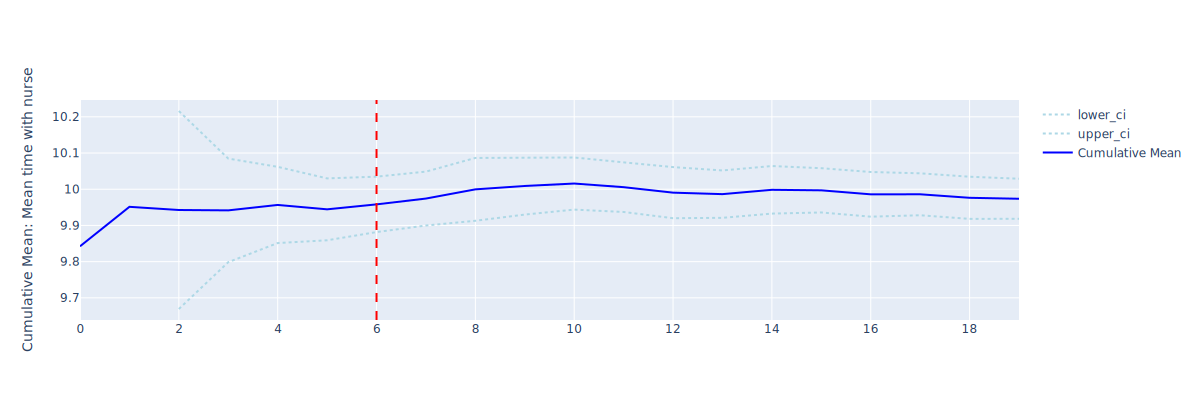

In [7]:
n_reps, cumulative_df = confidence_interval_method_simple(
    replications=20,
    metric='mean_time_with_nurse',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean time with nurse',
    file_path=os.path.join(OUTPUT_DIR, 'choose_param_conf_int_1.png'))

Reached desired precision (0.05) in 31 replications.
    replications  cumulative_mean     stdev   lower_ci   upper_ci  deviation
0              0        50.187329       NaN        NaN        NaN        NaN
1              1        50.906857       NaN        NaN        NaN        NaN
2              2        51.647229  1.470432  47.994472  55.299986   7.072512
3              3        51.013012  1.746532  48.233890  53.792134   5.447869
4              4        50.075454  2.585121  46.865602  53.285306   6.410031
5              5        48.237798  5.060452  42.927179  53.548416  11.009247
6              6        48.107789  4.632328  43.823600  52.391977   8.905395
7              7        49.738086  6.297295  44.473416  55.002756  10.584787
8              8        49.533032  5.922614  44.980508  54.085556   9.190885
9              9        50.227203  5.999883  45.935145  54.519261   8.545285
10            10        50.852808  6.058378  46.782735  54.922882   8.003636
11            11       

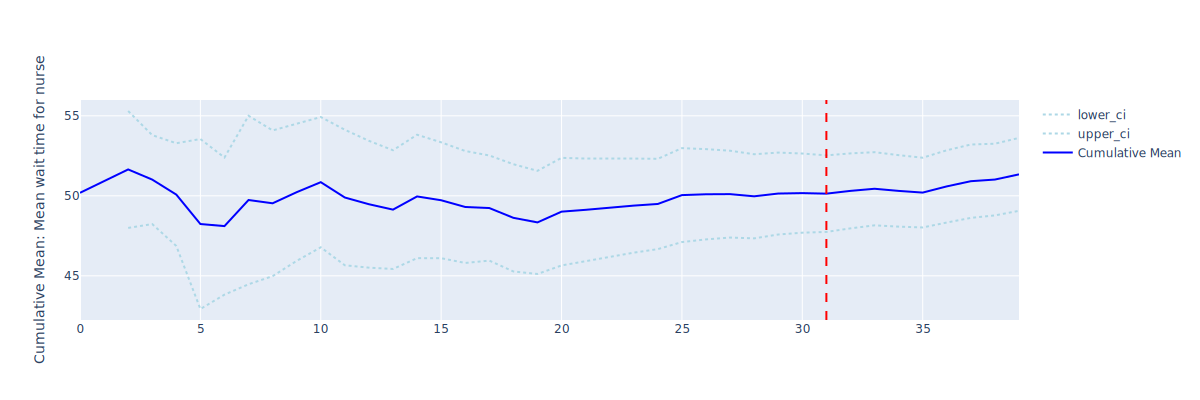

In [8]:
n_reps, cumulative_df = confidence_interval_method_simple(
    replications=40,
    metric='mean_q_time_nurse',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean wait time for nurse',
    file_path=os.path.join(OUTPUT_DIR, 'choose_param_conf_int_2.png'))

Reached desired precision (0.05) in 6 replications.
    replications  cumulative_mean     stdev   lower_ci   upper_ci  deviation
0              0        49.958879       NaN        NaN        NaN        NaN
1              1        50.078314       NaN        NaN        NaN        NaN
2              2        49.988671  0.195888  49.502058  50.475284   0.973446
3              3        49.947723  0.179690  49.661797  50.233649   0.572451
4              4        49.896857  0.192752  49.657523  50.136190   0.479656
5              5        49.794946  0.303376  49.476572  50.113320   0.639370
6              6        49.872608  0.344844  49.553681  50.191536   0.639485
7              7        49.931174  0.359679  49.630475  50.231873   0.602227
8              8        50.036796  0.462171  49.681540  50.392052   0.709990
9              9        50.032553  0.435945  49.720697  50.344410   0.623307
10            10        50.118632  0.502542  49.781020  50.456245   0.673627
11            11        

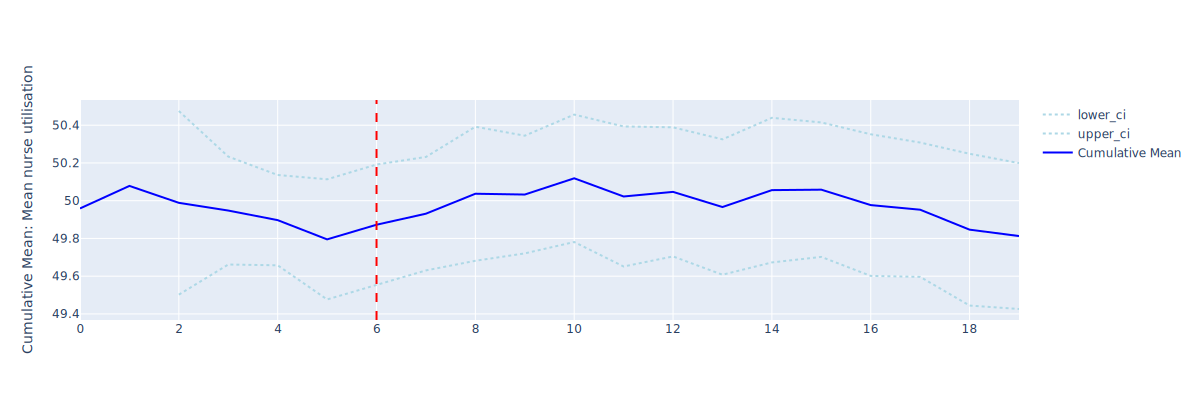

In [9]:
n_reps, cumulative_df = confidence_interval_method_simple(
    replications=20,
    metric='mean_nurse_utilisation',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean nurse utilisation',
    file_path=os.path.join(OUTPUT_DIR, 'choose_param_conf_int_3.png'))

### `confidence_interval_method`

Reached desired precision (0.05) in 6 replications.
               data  cumulative_mean  stdev  lower_ci  upper_ci  deviation
replications                                                              
1              9.93             9.93    NaN       NaN       NaN        NaN
2              9.94             9.93    NaN       NaN       NaN        NaN
3             10.02             9.96   0.05      9.84     10.08       0.01
4              9.88             9.94   0.06      9.85     10.03       0.01
5             10.04             9.96   0.07      9.88     10.04       0.01
6             10.09             9.98   0.08      9.90     10.06       0.01
7             10.20            10.01   0.11      9.91     10.11       0.01
8             10.09            10.02   0.11      9.94     10.11       0.01
9             10.08            10.03   0.10      9.95     10.11       0.01
10             9.90            10.02   0.10      9.94     10.09       0.01
11             9.81            10.00   0.12     

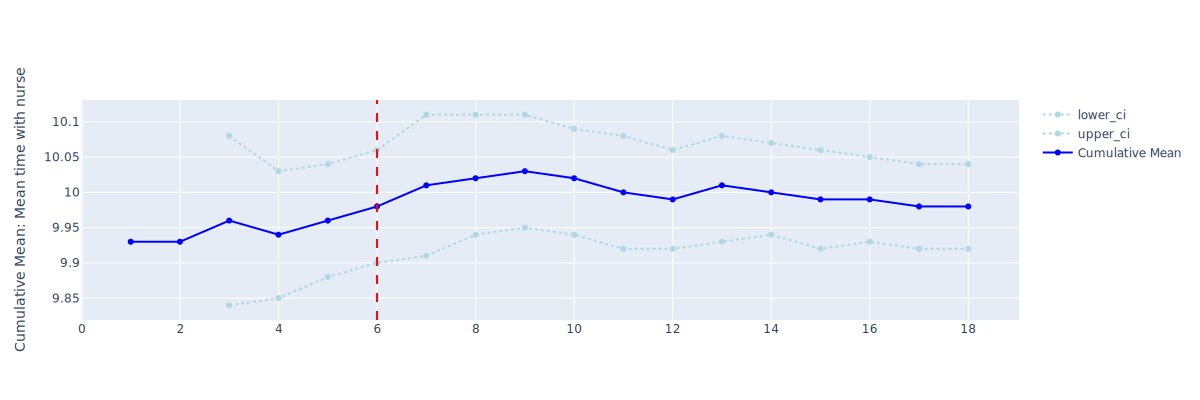

In [10]:
n_reps, cumulative_df = confidence_interval_method(
    replications=20,
    metric='mean_time_with_nurse',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean time with nurse')

Reached desired precision (0.05) in 31 replications.
              data  cumulative_mean  stdev  lower_ci  upper_ci  deviation
replications                                                             
1             0.53             0.53    NaN       NaN       NaN        NaN
2             0.49             0.51    NaN       NaN       NaN        NaN
3             0.46             0.50   0.03      0.41      0.58       0.17
4             0.39             0.47   0.06      0.37      0.56       0.20
5             0.47             0.47   0.05      0.41      0.53       0.14
6             0.61             0.49   0.07      0.42      0.57       0.16
7             0.48             0.49   0.07      0.43      0.55       0.13
8             0.56             0.50   0.07      0.44      0.56       0.11
9             0.57             0.51   0.07      0.46      0.56       0.10
10            0.39             0.50   0.07      0.44      0.55       0.11
11            0.44             0.49   0.07      0.44      0

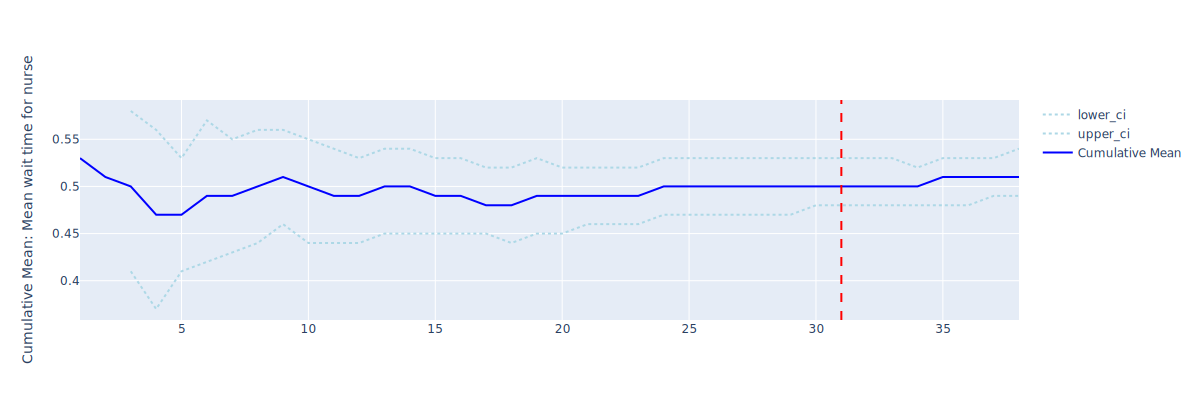

In [11]:
n_reps, cumulative_df = confidence_interval_method(
    replications=40,
    metric='mean_q_time_nurse',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean wait time for nurse')

<mark>Rounding is causing this... perhaps remove the rounding...</mark>

Reached desired precision (0.05) in 6 replications.
              data  cumulative_mean  stdev  lower_ci  upper_ci  deviation
replications                                                             
1             0.50              0.5    NaN       NaN       NaN        NaN
2             0.50              0.5    NaN       NaN       NaN        NaN
3             0.50              0.5   0.00      0.50      0.50       0.00
4             0.49              0.5   0.00      0.49      0.50       0.01
5             0.50              0.5   0.00      0.49      0.50       0.01
6             0.50              0.5   0.00      0.49      0.50       0.01
7             0.51              0.5   0.01      0.50      0.51       0.01
8             0.50              0.5   0.00      0.50      0.50       0.01
9             0.51              0.5   0.01      0.50      0.51       0.01
10            0.49              0.5   0.01      0.50      0.50       0.01
11            0.50              0.5   0.01      0.50      0.

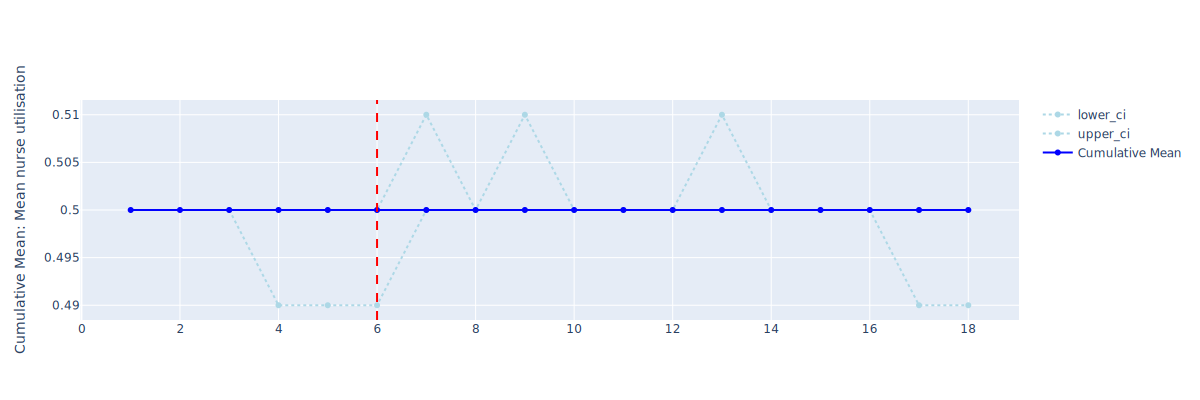

In [12]:
n_reps, cumulative_df = confidence_interval_method(
    replications=20,
    metric='mean_nurse_utilisation',
    desired_precision=0.05
)

print(cumulative_df)

plotly_confidence_interval_method(
    n_reps=n_reps,
    conf_ints=cumulative_df,
    metric_name='Mean nurse utilisation')

## Automated detection of appropriate number of replications

In [13]:
# Set up ReplicationTabulizer and ReplicationsAlgorithm
observer = ReplicationTabulizer()
analyser = ReplicationsAlgorithm(verbose=False, observer=observer)

Run the algorithm (which will run model with increasing reps) for a few different metrics.

3


,data,cumulative_mean,stdev,lower_ci,upper_ci,deviation
replications,,,,,,
1,9.842380,9.842380,NaN,NaN,NaN,NaN
2,10.060424,9.951402,NaN,NaN,NaN,NaN
3,9.925090,9.942631,0.110075,9.669189,10.216073,0.027502
4,9.938504,9.941599,0.089900,9.798549,10.084650,0.014389
5,10.016611,9.956602,0.084775,9.851339,10.061864,0.010572
6,9.883801,9.944468,0.081442,9.859000,10.029936,0.008595
7,10.040555,9.958195,0.082742,9.881671,10.034719,0.007685
8,10.086612,9.974247,0.089048,9.899801,10.048693,0.007464


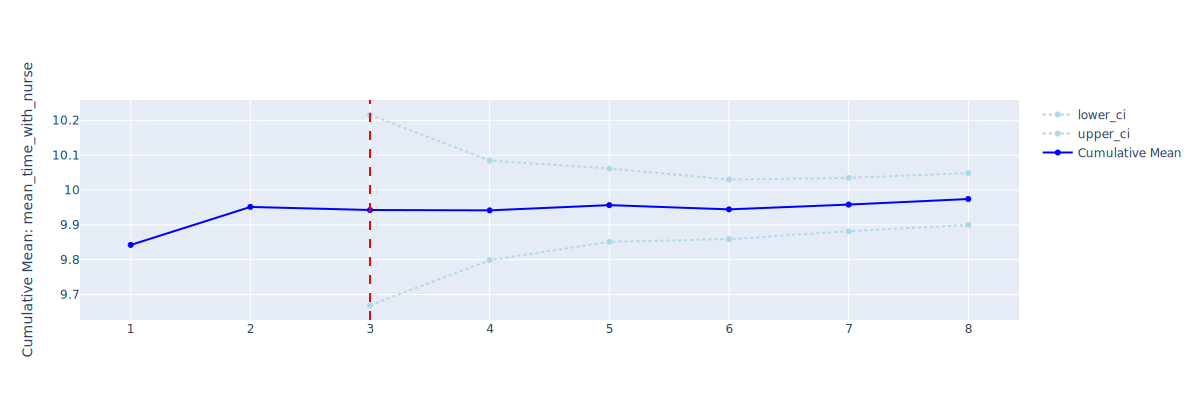

In [14]:
n_reps = analyser.select(runner=Runner(Param()),
                         metric='mean_time_with_nurse')
print(n_reps)
display(observer.summary_table())
plotly_confidence_interval_method(
    n_reps, observer.summary_table(), metric_name='mean_time_with_nurse')

31


,data,cumulative_mean,stdev,lower_ci,upper_ci,deviation
replications,,,,,,
1,0.501873,0.501873,NaN,NaN,NaN,NaN
2,0.516264,0.509069,NaN,NaN,NaN,NaN
3,0.531280,0.516472,0.014704,0.479945,0.553000,0.070725
4,0.491104,0.510130,0.017465,0.482339,0.537921,0.054479
5,0.463252,0.500755,0.025851,0.468656,0.532853,0.064100
6,0.390495,0.482378,0.050605,0.429272,0.535484,0.110092
7,0.473277,0.481078,0.046323,0.438236,0.523920,0.089054
8,0.611502,0.497381,0.062973,0.444734,0.550028,0.105848
9,0.478926,0.495330,0.059226,0.449805,0.540856,0.091909


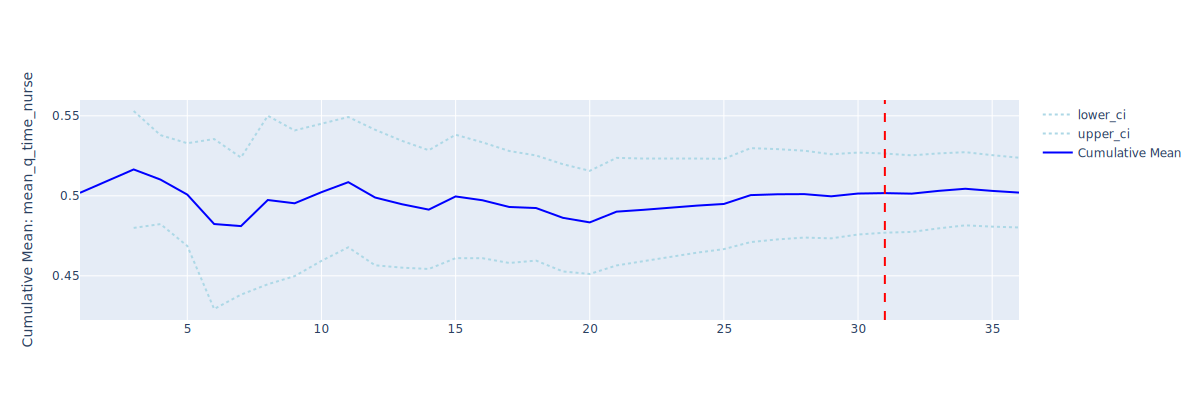

In [15]:
observer = ReplicationTabulizer()
analyser = ReplicationsAlgorithm(verbose=False, observer=observer)
n_reps = analyser.select(runner=Runner(Param()),
                         metric='mean_q_time_nurse')
print(n_reps)
display(observer.summary_table())
plotly_confidence_interval_method(
    n_reps, observer.summary_table(), metric_name='mean_q_time_nurse')

3


,data,cumulative_mean,stdev,lower_ci,upper_ci,deviation
replications,,,,,,
1,0.499589,0.499589,NaN,NaN,NaN,NaN
2,0.501977,0.500783,NaN,NaN,NaN,NaN
3,0.498094,0.499887,0.001959,0.495021,0.504753,0.009734
4,0.498249,0.499477,0.001797,0.496618,0.502336,0.005725
5,0.496934,0.498969,0.001928,0.496575,0.501362,0.004797
6,0.492854,0.497949,0.003034,0.494766,0.501133,0.006394
7,0.503386,0.498726,0.003448,0.495537,0.501915,0.006395
8,0.503411,0.499312,0.003597,0.496305,0.502319,0.006022


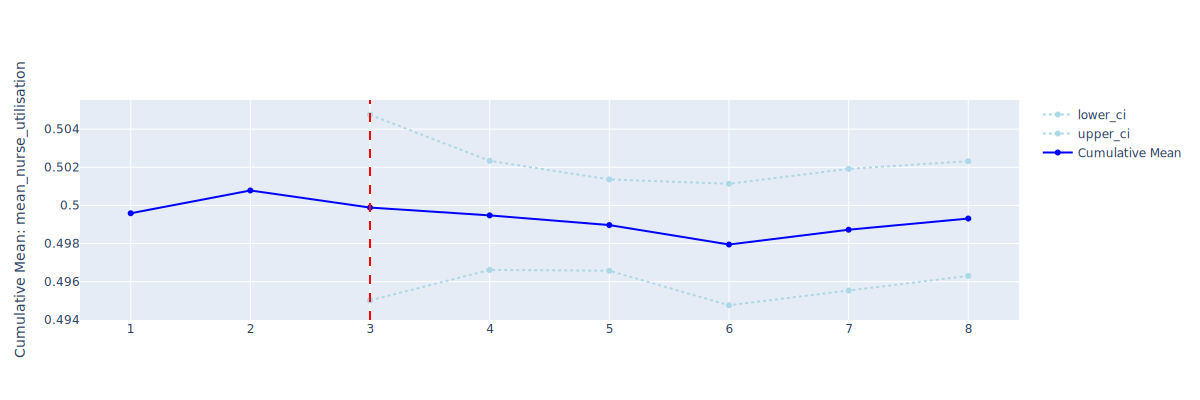

In [16]:
observer = ReplicationTabulizer()
analyser = ReplicationsAlgorithm(verbose=False, observer=observer)
n_reps = analyser.select(runner=Runner(Param()),
                         metric='mean_nurse_utilisation')
print(n_reps)
display(observer.summary_table())
plotly_confidence_interval_method(
    n_reps, observer.summary_table(), metric_name='mean_nurse_utilisation')

## Run time

In [17]:
# Get run time in seconds
notebook_end_time = time.time()
runtime = round(notebook_end_time - notebook_start_time)

# Display converted to minutes and seconds
print(f'Notebook run time: {runtime // 60}m {runtime % 60}s')

Notebook run time: 0m 15s
